# steady state kinematic wave in numpy, displayed with a widget #
### By Dr. H. C. Winsemius ###

Let's build a simple steady state 1D model with a constant flow in a rectangular channel. We'll check the impact of boundary condition values width and roughness on the resulting water levels

In [1]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
# from ipywidgets import StaticInteract, RangeWidget, RadioWidget



The equations we are solving represent the continuity equation (how much flow goes into and out of a given section, how much does this change the storage?)

$$
\frac{\partial{A}}{\partial{t}} + \frac{\partial{Q}}{\partial{x}} = q
$$

And the momentum equation (simplified by reducing the local inertia terms to zero)



Full Saint Venant equation (without wind friction considered) reads as:
Local intertia + advection + gravitation + hydraulic roughness:

$$
\frac{\partial Q}{\partial t} + \frac{\partial}{\partial x}\left(\frac{Q^2}{A}\right)+gA\frac{\partial \left(h+z\right)}{\partial x}+\frac{gn^2Q|Q|}{R^{4/3}A}=0
$$

In these equations, $A$ [L$^2$] is the wetted cross-section, $t$ is the time [T], $Q$ [L$^3$ T$^{-1}$] is the flow and $x$ is the longitudinal position [L], usually we use meters and seconds for the magnitudes L and T.

We assume local inertia is negligible and we use a steady state solution, meaning that any differential over $t$ is zero. This yields:

$$
\frac{\partial Q}{\partial x}=q
$$

and
for our continuity equation

$$
A\frac{\partial \left(h+z\right)}{\partial x}+\frac{n^2Q|Q|}{R^{4/3}A}=0 \\
$$

Moving $Q$ to the lhs we get:

$$
Q^2=\frac{1}{n^2}A^2R^{4/3}\frac{\partial \left(h+z\right)}{\partial x}
$$

and

$$
Q=\frac{1}{n}AR^{2/3}\left(\frac{\partial \left(h+z\right)}{\partial x}\right)^{1/2}
$$

Assuming $R=h$ (the case with relatively wide channels) and $A = Bh$ gives

$$
Q=\frac{B}{n}h^{5/3}\left(\frac{\partial \left(h+z\right)}{\partial x}\right)^{1/2}
$$

In the steady-state case we can assume that the slope of the water level $\left(\partial{h+z}/\partial x\right)$ equals the bottom slope, so we replace this terms by a constant $s_b$ and solve this for $h$. 
$$
h = \left(\frac{Qn}{Bs_b^{1/2}}\right)^{3/5}
$$



This is the so-called kinematic wave equation. It can only be used in a (quasi-) steady state assumption. So $Q$ and $h$ should not vary significantly in time!! Also, influence of a downstream boundary cannot be applied. In our case we assume a fully steady state conditionWe solve this with a plotting code below

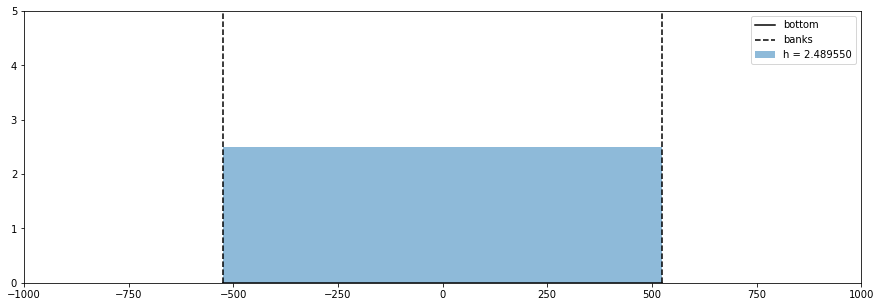

In [3]:
def plot_h(Q, slope, n, B):
    """
    explicit solver (1-step ahead) for a 1-dimensional domain, 
    
    
    """
    ylim=[0., 5.]
    xlim=[-1000, 1000]
    # compute h
    num = float(Q)*n
    denom = float(B)*slope**0.5
    h = (num/denom)**(3./5)
    
    # now plot
    plt.figure(figsize=(15, 5))
    plt.plot([-0.5*B, 0.5*B], [0, 0], 'k', label='bottom')
    plt.fill_between([-0.5*B, 0.5*B], [h, h], alpha=0.5, label='h = {:f}'.format(h))
    plt.plot([-0.5*B, -0.5*B], ylim, 'k--', label='banks')
    plt.plot([0.5*B, 0.5*B], ylim, 'k--')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
#     return h
Q = 12000
B = 800
slope = 0.01
n = 0.05
interact(plot_h,
               Q=(500., 15000., 1.),
               slope=(.0001, 0.3, 0.0001),
               n=(0.001, 0.2, 0.001),
               B=(100, 2000, 1)
              )
# h = plot_h(Q, slope, n, B)